In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max

In [39]:
# Question a
img41 = cv2.imread('Lab3_images/Lab3_images/imgQ41.jpg')


In [40]:
img41 = cv2.cvtColor(img41,cv2.COLOR_BGR2RGB)
img411 = cv2.resize(img41,(100,100))
img4111 = np.reshape(img411,[-1,3])
bandwidth = estimate_bandwidth(img4111, quantile=0.2, n_samples=500)
ms41 = MeanShift(bandwidth = bandwidth, bin_seeding=True)
ms41.fit(img4111)
labels41 = ms41.labels_

In [162]:
labels41 = labels41.reshape((img41.shape[0],img41.shape[1]))

In [26]:
img411.shape

(10000, 3)

In [23]:
aa = np.stack(aaa1,axis = 1)
aa.shape

(100, 100)

In [40]:
aaa2 = np.stack((aaa1,aaa1,aaa1),axis = 2)
aaa2 = np.array(aaa2,dtype='uint8')

In [41]:
aaa2 = cv2.resize(aaa2,(img41.shape[1],img41.shape[0]))

In [41]:
centers41 = ms41.cluster_centers_
center41 = np.uint8(centers41)
res41 = center41[labels41.flatten()]
res41 = res41.reshape((img411.shape))
res41 = cv2.resize(res41,(img41.shape[1],img41.shape[0]))

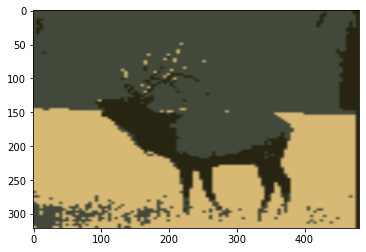

In [43]:
plt.imshow(res41)

In [15]:
img41

array([[[ 37,  42,  35],
        [ 39,  44,  37],
        [ 32,  37,  30],
        ...,
        [ 11,  13,  12],
        [  9,  11,  10],
        [ 10,  12,   9]],

       [[ 58,  63,  56],
        [ 60,  65,  58],
        [ 56,  61,  54],
        ...,
        [ 11,  13,  12],
        [  9,  11,  10],
        [ 10,  12,   9]],

       [[ 54,  59,  52],
        [ 55,  60,  53],
        [ 53,  58,  51],
        ...,
        [ 10,  12,  11],
        [ 10,  12,  11],
        [ 10,  12,   9]],

       ...,

       [[118,  94,  50],
        [142, 117,  76],
        [147, 123,  85],
        ...,
        [ 38,  23,   2],
        [ 39,  27,  11],
        [ 35,  21,   8]],

       [[145, 120,  79],
        [150, 125,  84],
        [149, 124,  84],
        ...,
        [ 45,  30,   9],
        [ 38,  26,  10],
        [ 34,  20,   7]],

       [[154, 129,  89],
        [149, 124,  83],
        [145, 120,  79],
        ...,
        [ 43,  28,   7],
        [ 38,  25,   8],
        [ 35,  22,   6]]

In [141]:
gray41 = cv2.cvtColor(img41, cv2.COLOR_BGR2GRAY)




#gray41 = np.concatenate([gray41, thresh], axis=1)

In [142]:
#gray41 = cv2.GaussianBlur(gray41, (5,5),1)
#r,thresh = cv2.threshold(gray41,127,255,cv2.THRESH_BINARY_INV)

In [143]:
r,thresh = cv2.threshold(gray41,127,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
#thresh = cv2.GaussianBlur(thresh, (3,3),1)
gray41 = np.concatenate([gray41, thresh], axis=1)

In [144]:
distance = ndi.distance_transform_edt(gray41)
local_maxi = peak_local_max(distance, indices = False, footprint=np.ones((3,3)),labels = gray41)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=gray41)
# labels = cv2.GaussianBlur(labels, (3,3),1)

In [145]:
labels.shape

(321, 962)

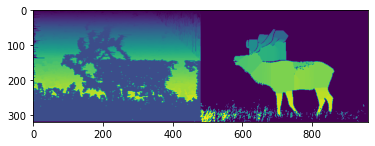

In [146]:
plt.imshow(labels)

In [250]:
img42 = cv2.imread('Lab3_images/Lab3_images/imgQ42.jpg')


In [251]:
img42 = cv2.cvtColor(img42,cv2.COLOR_BGR2RGB)
img421 = cv2.resize(img42,(100,100))
img422 = np.reshape(img421,[-1,3])
bandwidth = estimate_bandwidth(img422, quantile=0.2, n_samples=500)
ms42 = MeanShift(bandwidth = bandwidth, bin_seeding=True)
ms42.fit(img422)
labels42 = ms42.labels_


error: OpenCV(3.4.2) c:\projects\opencv-python\opencv\modules\imgproc\src\color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'cv::CvtHelper<struct cv::Set<3,4,-1>,struct cv::Set<3,4,-1>,struct cv::Set<0,2,5>,2>::CvtHelper'


In [5]:
centers42 = ms42.cluster_centers_
center42 = np.uint8(centers42)
res42 = center42[labels42.flatten()]
res42 = res42.reshape((img421.shape))
res42 = cv2.resize(res42,(img42.shape[1],img42.shape[0]))

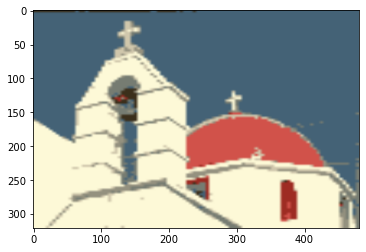

In [12]:
plt.imshow(res42)
plt.show()

In [13]:
cv2.imshow('image',res41)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'res41' is not defined

In [240]:
gray42 = cv2.cvtColor(img42, cv2.COLOR_BGR2GRAY)
#gray42 = cv2.GaussianBlur(gray42, (3,3),0)

In [241]:
thresh = cv2.threshold(gray42, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
thresh = cv2.medianBlur(thresh, 3)
distance = ndi.distance_transform_edt(thresh)
local_max = peak_local_max(distance,min_distance=5,  indices=False)
markers = ndi.label(local_max, structure=np.ones((3, 3)))[0]
ws_labels = watershed(-distance, markers, mask=thresh)

In [236]:
r2,thresh2 = cv2.threshold(gray42,100,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
thresh2 = cv2.medianBlur(thresh2, 3)
gray42 = np.concatenate([gray42, thresh2], axis=1)

In [237]:
distance2 = ndi.distance_transform_edt(gray42)
local_maxi2 = peak_local_max(distance2, indices = False, footprint=np.ones((3,3)),labels = gray42)
markers2 = ndi.label(local_maxi2, structure=np.ones((3, 3)))[0]
labels2 = watershed(-distance2, markers2, mask=gray42)

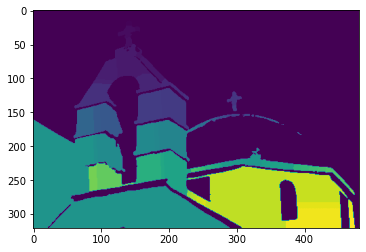

In [242]:
plt.imshow(ws_labels)

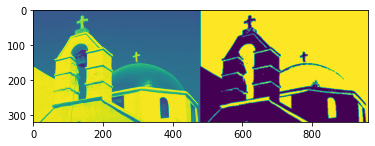

In [238]:
plt.imshow(gray42)